In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [3]:
gold_data = pd.read_csv('goldpriceRFR.csv')

In [5]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [9]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [11]:
gold_data.shape

(2290, 6)

In [15]:
#To print last 5 rows
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [17]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [19]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [25]:
numeric_gold_data = gold_data.select_dtypes(include=[np.number])

# Calculate correlation
corre = numeric_gold_data.corr()

print(corre)

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


<Axes: >

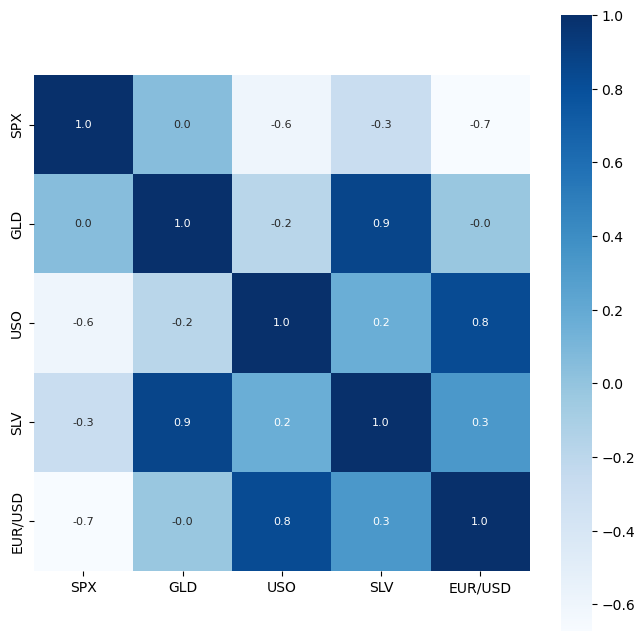

In [29]:
plt.figure(figsize  = (8,8))
sns.heatmap(corre, cbar = True, square = True,fmt = '.1f', annot = True, annot_kws = {'size':8}, cmap='Blues' )

In [31]:
print(corre['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\sarfr\AppData\Local\Temp\ipykernel_2060\2492781838.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color = 'green')


<Axes: xlabel='GLD', ylabel='Density'>

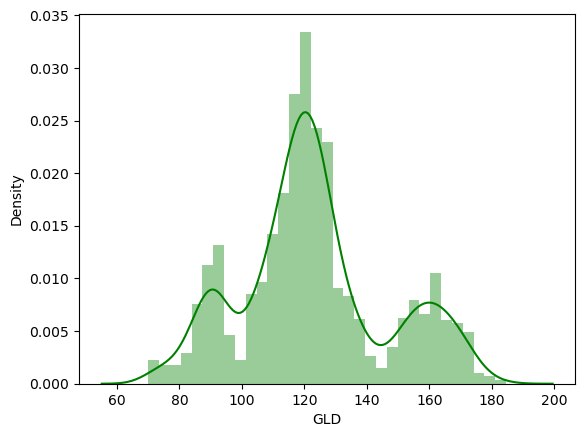

In [33]:
sns.distplot(gold_data['GLD'],color = 'green')

In [35]:
#spliting the Features and Targets
X = gold_data.drop(['Date','GLD'], axis = 1)
y = gold_data['GLD']

In [37]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [39]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [43]:
#Training Model             ---Random Forest Regressor---
regr = RandomForestRegressor(n_estimators= 100)  # this is the default number we give usually

In [45]:
regr.fit(X_train,y_train)

RandomForestRegressor()

In [49]:
#Model Evaluation
test_data_pred = regr.predict(X_test)
print(test_data_pred)

[168.54559942  82.23619999 116.32039987 127.65600071 120.60200115
 154.81679748 150.39569775 125.97710047 117.42399875 125.96090074
 116.6942011  171.65670057 141.26919848 167.58459883 115.10940011
 117.77030062 139.18590334 170.3712011  159.29360341 157.51199938
 155.14120015 125.10600033 175.04230004 157.00520403 125.12290033
  93.67959965  78.68029966 120.72269996 119.12309932 167.51310011
  88.16370043 125.15579985  91.21420079 117.64250023 121.0425991
 136.97890084 115.37290136 115.11220072 147.26839941 107.20150079
 104.95340286  87.33569812 126.5213007  118.15109983 152.2416991
 119.58950006 108.51739962 108.02929855  93.35000088 127.0420981
  74.90530047 113.59789893 121.13919998 111.24969921 118.90399883
 120.69959935 159.37379997 168.06650146 146.98839641  85.98159887
  94.38930032  86.9506986   90.58930025 118.99660064 126.43880093
 127.5486006  170.5149994  122.31349973 117.44309856  98.54490019
 168.26850073 142.77599857 132.09360205 121.1767023  120.98459923
 119.82070049

In [51]:
#R squared error
er_sco = metrics.r2_score(y_test,test_data_pred)
print('R2 Error: ', er_sco)

R2 Error:  0.9884393646952043


In [53]:
y_test = list(y_test)

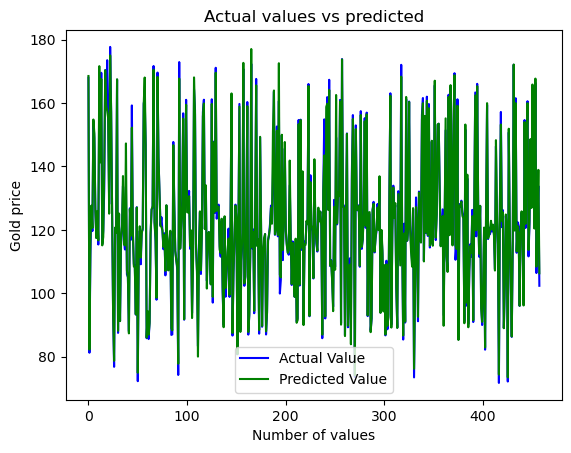

In [55]:
#Comparing the actual and predicted values
plt.plot(y_test, color = 'blue', label = 'Actual Value')
plt.plot(test_data_pred, color='green', label = 'Predicted Value')
plt.title('Actual values vs predicted')
plt.xlabel('Number of values')
plt.ylabel('Gold price')
plt.legend()
plt.show()